In [3]:
from typing import overload, Union, Optional, List

from sympy import  Basic, latex
from sympy.core._print_helpers import Printable


@overload
def print_sympy_entity(text: Optional[str] = None) -> None:
    ...

@overload
def print_sympy_entity(text: Optional[str] = None, expression: Optional[Union[str, Basic]] = None, *, raw: bool = True) -> None:
    ...

@overload
def print_sympy_entity(text: Optional[str] = None, *expressions: Union[str, Basic], raw: bool = True) -> None:
    ...

def print_sympy_entity(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Union[str, Printable]] = kwargs.get("expression", None)

    if text is None and args:
        text = args[0]
    
    expressions: List[Union[str, Printable]] = \
        [expr for expr in args[1:] if isinstance(expr, (str, Printable))] \
        if len(args) > 1 else []

    if expression is not None:
        expressions.append(expression)

    if not expressions:
        if text is not None:
            display(Latex("$ \\text{" + text + "} $"))
        return
    
    is_raw: bool = kwargs.get("raw", True)
    if len(expressions) == 1:
        final_expr = '$ ' + (latex(expressions[0]) if is_raw else expressions[0]) + ' $'
    else:
        final_expr: str = \
            r'$ \\' + r'\\'.join(map(latex, expressions) if is_raw else expressions) + ' $'

    if text is not None:
        final_expr = "$ \\text{" + text + "} $ " + final_expr

    display(Latex(final_expr))


In [1]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, Equality, sqrt, Expr
from sympy.core.numbers import Integer
from sympy import solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [88]:
# Первый способ, матрица третьего порядка.
from sympy.abc import x, y, z

b: Matrix = Matrix((0, 0, 0)).T
X: Matrix = Matrix((x, y, z))
c = -4
A: Matrix = Matrix((
    (4, -12, 4*sqrt(3)),
    (-12, -7, 5*sqrt(3)),
    (4*sqrt(3), 5*sqrt(3), 3)
))

u: Matrix = (X.T*A)*X
v: Matrix = 2*b*x
eq: Equality = Eq((u[0] + b[0] + c).expand().simplify(), 0)
print_sympy_entity("Уравнение поверхности:", eq)

<IPython.core.display.Latex object>

In [89]:
# Второй способ, матрица четвертого порядка.
A1: Matrix = Matrix((
    (4, -12, 4*sqrt(3), 0),
    (-12, -7, 5*sqrt(3), 0),
    (4*sqrt(3), 5*sqrt(3), 3, 0),
    (0, 0, 0, -4)
))
X1: Matrix = Matrix((x, y, z, 1))
u: Matrix = X1.T*A1*X1
eq: Equality = Eq(u[0].expand().simplify(), 0)
print_sympy_entity("Уравнение поверхности:", eq)

<IPython.core.display.Latex object>

Перенесем свободный член в правую часть и поделим обе части на свободный член с противоположным знаком.

In [90]:
equality: Expr = eq.args[0]
c: Integer = equality.args[0]
eq1 = Eq((equality - c) / (-c), 1)
print_sympy_entity("Уравнение поверхности:", eq1)

<IPython.core.display.Latex object>

In [91]:
X2: Matrix = Matrix((x, y, z))
A2: Matrix = Matrix((
    (4, -12, 4*sqrt(3)),
    (-12, -7, 5*sqrt(3)),
    (4*sqrt(3), 5*sqrt(3), 3)
))
c = -4

P2: Matrix = Matrix([Matrix([vect.normalized() for vect in vects]).T for _, _, vects in A2.eigenvects()]).T

A2_new = P2.T*A2*P2
X2_new = Matrix(symbols('x1 y1 z1'))
quadratic_form = (X2_new.T*A2_new*X2_new)[0].expand().simplify().expand()
print_sympy_entity("Квадратичная формула:", Eq(quadratic_form/(-c), 1))

<IPython.core.display.Latex object>

Получился Однополостной гиперболоид.

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

In [92]:
X3: Matrix = Matrix((x, y, z))
A3: Matrix = Matrix((
    (24, -2*sqrt(2), 2*sqrt(2)),
    (-2*sqrt(2), 18, 6),
    (2*sqrt(2), 6, 18),
))
c = -4
eq3 = Eq((X3.T * A3 * X3)[0].expand().simplify() + c, 0)
print_sympy_entity("Уравнение поверхности:", eq3)

P3: Matrix = Matrix([Matrix([vect.normalized() for vect in vects]).T for _, _, vects in A3.eigenvects()]).T

A3_new = P3.T*A3*P3
x1, y1, z1 = symbols('x1 y1 z1')
X3_new = Matrix((x1, y1, z1))
quadratic_form = (X3_new.T*A3_new*X3_new)[0].expand().simplify()
eq3 = Eq(quadratic_form/(-c), 1)
print_sympy_entity("Квадратичная формула:", eq3)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

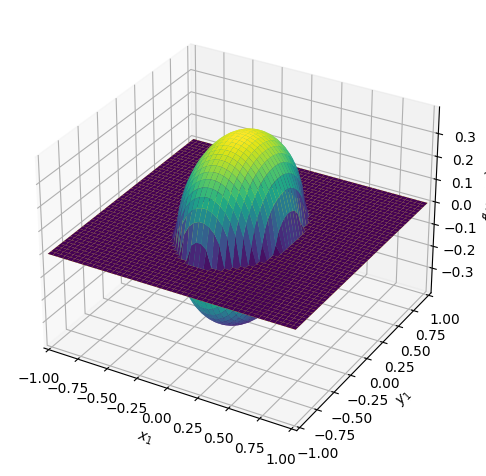

In [93]:
Z: List[Expr] = solve(eq3, z1)
print_sympy_entity(expression='z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z)), raw=False)
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

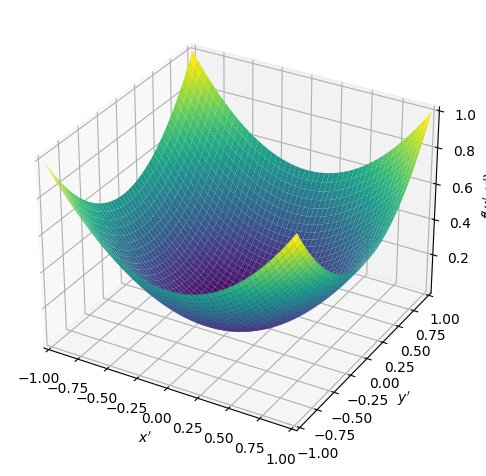

In [94]:
# Уравнение уже свободно от мономов вида xy, yz, xz
A4: Matrix = Matrix((
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 0)
))
b4: Matrix = Matrix((1, -2, 1)).T
c4 = 1
x, y, z = symbols("x y z")
X4: Matrix = Matrix((x, y, z))

eq: Equality = Eq((X4.T * A4 * X4 + 2*b4*X4)[0].expand() + c4, 0)
print_sympy_entity("Данное уравнение поверхности:", eq)

# Свернём квадраты:
# x**2 + 2*x = (x + 1)**2 - 1 = (x')**2 - 1
# y**2 - 4*y = (y-2)**2 - 4 = (y')**2 - 4
c_new = c4
for i in range(2):
    c_new -= b4[i]**2 / A4[i, i]
x1, y1, z1 = symbols("x' y' z'")
X4_new: Matrix = Matrix((x1, y1, z1))
eq_new = (X4_new.T * A4 * X4_new)[0].expand() + 2*b4[2]*z + c_new
print_sympy_entity("Преобразованное уравнение:", Eq(eq_new, 0))
# Замена -2*z + 4 = 2*z'
eq_new = eq_new.subs({-2*b4[2]*z + 4: 2*z1})
z_subs = eq_new.args[2]
eq_new_can: Equality = Eq(eq_new - z_subs, -z_subs)
print_sympy_entity("Каноническое уравнение поверхности:", eq_new_can)

Z: List[Expr] = solve(eq_new_can, z1)
print_sympy_entity(expression='z = {0}\\'.format(*map(latex, Z)), raw=False)
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))


Получился эллиптический парабалоид. 
Чтобы поучить каноническое уравнение, достаточно провести замену переменной, избавляющую от свободного члена:

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.

#### Вариант N 50

$$479 x^{2} - 8 \sqrt{21} x y + 842 \sqrt{3} x z - 716 y^{2} + 24 \sqrt{7} y z - 363 z^{2} + 400 = 0$$

In [4]:
# Заметим, что вектор b = (0, 0, 0) (коэффициенты при x^1, y^1, z^1)
A5: Matrix = Matrix((
    (479, -4*sqrt(21), 421*sqrt(3)),
    (-4*sqrt(21), -716, 12*sqrt(7)),
    (421*sqrt(3), 12*sqrt(7), -363)
))
x, y, z = symbols("x y z")
X5: Matrix = Matrix((x, y, z))
c5 = 400
eq5 = Eq((X5.T * A5 * X5)[0].expand() + c5, 0)
print_sympy_entity("Уравнение поверхности:", eq5)

<IPython.core.display.Latex object>

In [5]:
P5: Matrix = Matrix([Matrix([vect.normalized() for vect in vects]).T for _, _, vects in A5.eigenvects()]).T
P5.simplify()
A5_new: Matrix = P5**(-1)*A5*P5
A5_new.simplify()
print_sympy_entity("Матрица квадратичной формы в новом базисе из собственных векторов:", A5_new)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

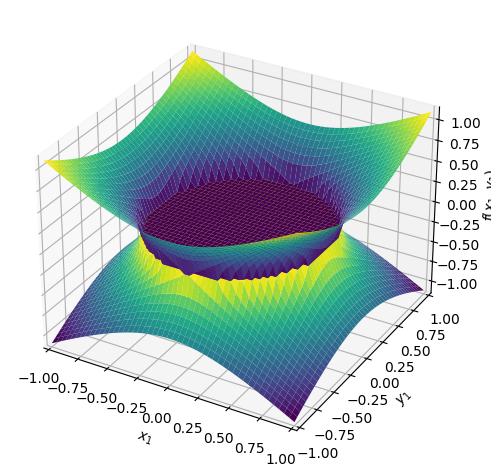

In [6]:
x1, y1, z1 = symbols('x1 y1 z1')
X5_new = Matrix((x1, y1, z1))
quadratic_form_5: Expr = (X5_new.T*A5_new*X5_new)[0].expand().collect((x1, y1, z1))
eq5: Equality = Eq(quadratic_form_5 / (-c5), 1)
print_sympy_entity("Уравнение поверхности в каноническом виде:", eq5)

Z: List[Expr] = solve(eq5, z1)
print_sympy_entity(expression='z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z)), raw=False)
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

Получился однополосный гиперболоид. (при y1 и z1 коэффициенты положительные)